<a href="https://colab.research.google.com/github/Rushikesh419/Machine-learning/blob/main/cross_val_text_classifiction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/content/airline_tweets.csv')

In [3]:
data=df[['airline_sentiment','text']]

In [4]:
X = data['text']
y=data['airline_sentiment']

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=101)

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [8]:
tfidf=TfidfVectorizer(stop_words='english')

In [9]:
tfidf.fit(X_train)

TfidfVectorizer(stop_words='english')

In [10]:
X_train=tfidf.transform(X_train)

In [12]:
X_test=tfidf.transform(X_test)

In [14]:
from sklearn.svm import SVC

In [13]:
from sklearn.model_selection import GridSearchCV

In [25]:
svm_param_grid={'C':[0.01,0.1,0.5,1],'kernel':['linear','rbf',],
                'gamma':['sacle','auto']}

In [26]:
svc=SVC()

In [27]:
svm_grid=GridSearchCV(svc,param_grid=svm_param_grid)

In [28]:
svm_grid.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
40 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 180, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 0.5, 1], 'gamma': ['sacle', 'auto'],
                         'kernel': ['linear', 'rbf']})

In [30]:
svm_grid.best_params_

{'C': 1, 'gamma': 'auto', 'kernel': 'linear'}

In [31]:
from sklearn.linear_model import LogisticRegression

In [33]:
log_model=LogisticRegression(max_iter=1000)

In [34]:
log_param_grid={'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2']}


In [35]:
logi_grid=GridSearchCV(log_model,param_grid=log_param_grid,cv=5)

In [36]:
logi_grid.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2']})

In [37]:
logi_grid.best_params_

{'C': 1, 'penalty': 'l2'}

In [38]:
from sklearn.naive_bayes import MultinomialNB

In [39]:
nb=MultinomialNB()

In [40]:
nb_param_grid={'alpha': [0.5, 1.0, 2.0, 5.0]}

In [41]:
nb_grid=GridSearchCV(nb,param_grid=nb_param_grid)

In [42]:
nb_grid.fit(X_train,y_train)

GridSearchCV(estimator=MultinomialNB(),
             param_grid={'alpha': [0.5, 1.0, 2.0, 5.0]})

In [43]:
nb_grid.best_params_

{'alpha': 0.5}

In [44]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,confusion_matrix

In [56]:
from sklearn.metrics import accuracy_score

In [57]:

def report(model):
  preds=model.predict(X_test)
  print('best parameters:', model.best_params_)
  print(classification_report(y_test,preds))
  print(confusion_matrix(y_test,preds))
  print('accuracy score : ', accuracy_score(y_test,preds))
  ConfusionMatrixDisplay.from_estimator(model,X_test,y_test)

best parameters: {'C': 1, 'gamma': 'auto', 'kernel': 'linear'}
              precision    recall  f1-score   support

    negative       0.81      0.91      0.86      1817
     neutral       0.62      0.50      0.55       628
    positive       0.79      0.64      0.70       483

    accuracy                           0.78      2928
   macro avg       0.74      0.68      0.71      2928
weighted avg       0.77      0.78      0.77      2928

[[1656  130   31]
 [ 266  312   50]
 [ 114   62  307]]
accuracy score :  0.7769808743169399


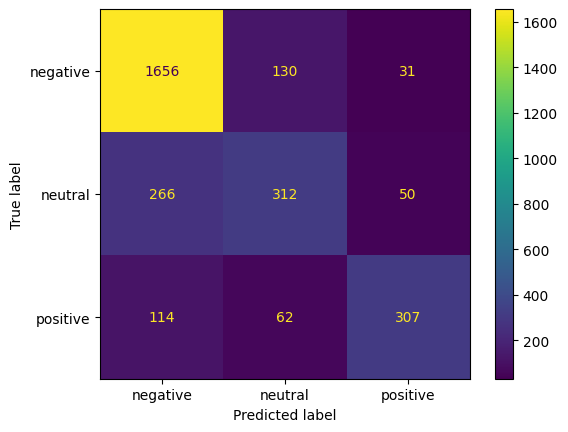

In [58]:
report(svm_grid)

best parameters: {'C': 1, 'penalty': 'l2'}
              precision    recall  f1-score   support

    negative       0.80      0.93      0.86      1817
     neutral       0.63      0.47      0.54       628
    positive       0.82      0.58      0.68       483

    accuracy                           0.77      2928
   macro avg       0.75      0.66      0.69      2928
weighted avg       0.77      0.77      0.76      2928

[[1695  101   21]
 [ 294  293   41]
 [ 133   70  280]]
accuracy score :  0.7745901639344263


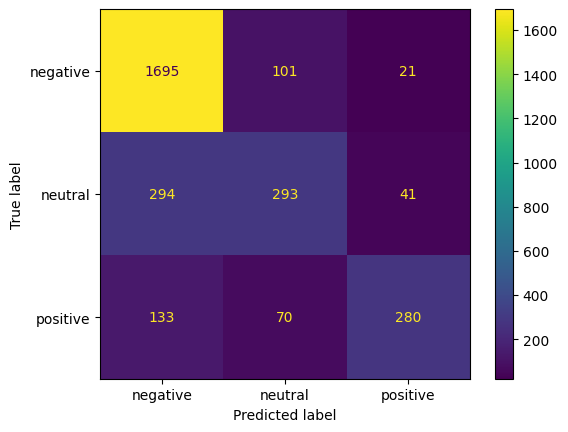

In [59]:
report(logi_grid)

best parameters: {'alpha': 0.5}
              precision    recall  f1-score   support

    negative       0.69      0.99      0.81      1817
     neutral       0.74      0.22      0.34       628
    positive       0.86      0.26      0.39       483

    accuracy                           0.70      2928
   macro avg       0.76      0.49      0.52      2928
weighted avg       0.73      0.70      0.64      2928

[[1797   17    3]
 [ 470  140   18]
 [ 328   31  124]]
accuracy score :  0.7038934426229508


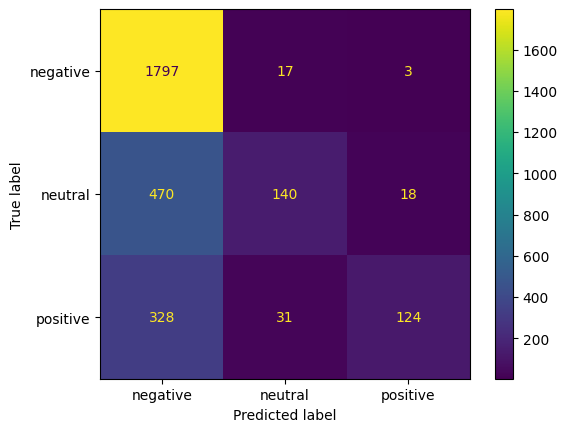

In [60]:
report(nb_grid)

In [62]:
from sklearn.pipeline import Pipeline

In [64]:
pipe=Pipeline([('tfidf',TfidfVectorizer()),
              ('svc',SVC())])

In [66]:
pipe.fit(X,y)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svc', SVC())])

In [67]:
pipe.predict(['good flight'])

array(['positive'], dtype=object)

In [68]:
pipe.predict(['bad flight'])

array(['negative'], dtype=object)

In [69]:
pipe.predict(['ok flight'])

array(['neutral'], dtype=object)